In [223]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow

In [121]:
from keras.datasets import boston_housing

In [122]:
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

## Attributes of Data

In [123]:
print(len(train_data))
print(len(test_data))
print(train_data.shape)
print(test_data.shape)

404
102
(404, 13)
(102, 13)


### Labels are the mean price values in 1k dollars

In [124]:
print(train_targets)

print(test_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [125]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)

In [126]:
train_data-=mean
train_data/=std

In [127]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

## Lets get started

In [128]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


## K-Fold Validation

In [178]:
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
num_val_samples

101

In [184]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],axis=0)
    model=build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [187]:
print(all_scores)
np.mean(all_scores)

[2.12963606343411, 2.206031074618349, 3.005267889192789, 2.325352980948911]


2.4165720020485395

## For 500 epochs

In [216]:
k=4
num_val_samples=len(train_data)//k
num_epochs=500
all_mae_histories=[]
num_val_samples

101

In [218]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],axis=0)
    model=build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [220]:
len(all_mae_histories[0])

500

In [221]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [222]:
average_mae_history

[4.305534424168048,
 3.2796271649917754,
 3.1815577001854924,
 2.8934414150691268,
 2.727753810363241,
 2.8084227094555843,
 2.689997775719897,
 2.590358354077481,
 2.7463815920423755,
 2.5497122743342184,
 2.7506216953296474,
 2.603269195792699,
 2.5140678174424878,
 2.5269292404155923,
 2.5050863688535028,
 2.5055831186842212,
 2.680897279541091,
 2.4488620510195744,
 2.4959392335155224,
 2.468154842900758,
 2.4601977119351375,
 2.5753436324620007,
 2.4644445712023444,
 2.358726883878802,
 2.4698737080734556,
 2.408548696796493,
 2.4199886605291083,
 2.3450416538975025,
 2.347392751438783,
 2.4371224830646323,
 2.482875844039539,
 2.4504925732565397,
 2.3954731639068907,
 2.4224457811601092,
 2.3177834725616004,
 2.3990578734048524,
 2.2865359523508806,
 2.3887699500168904,
 2.297018865547558,
 2.335434581973765,
 2.3749414729599905,
 2.3526620487175363,
 2.2847840821388927,
 2.341627883439017,
 2.3458059742899224,
 2.4175682587198692,
 2.425284638263211,
 2.3259810203372844,
 2.2944

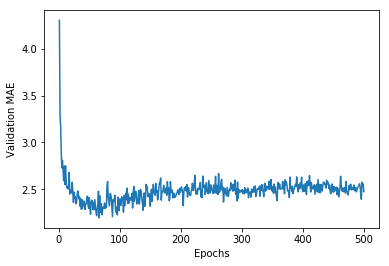

In [224]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()